In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab/Waste_Data

/content/drive/MyDrive/Colab/Waste_Data


In [ ]:
!unzip /content/drive/MyDrive/Colab/Waste_Data/Waste.zip

Streaming output truncated to the last 5000 lines.
  inflating: DATASET/TRAIN/R/R_5499.jpg  
  inflating: DATASET/TRAIN/R/R_55.jpg  
  inflating: DATASET/TRAIN/R/R_550.jpg  
  inflating: DATASET/TRAIN/R/R_5500.jpg  
  inflating: DATASET/TRAIN/R/R_5501.jpg  
  inflating: DATASET/TRAIN/R/R_5502.jpg  
  inflating: DATASET/TRAIN/R/R_5503.jpg  
  inflating: DATASET/TRAIN/R/R_5504.jpg  
  inflating: DATASET/TRAIN/R/R_5505.jpg  
  inflating: DATASET/TRAIN/R/R_5506.jpg  
  inflating: DATASET/TRAIN/R/R_5507.jpg  
  inflating: DATASET/TRAIN/R/R_5508.jpg  
  inflating: DATASET/TRAIN/R/R_5509.jpg  
  inflating: DATASET/TRAIN/R/R_551.jpg  
  inflating: DATASET/TRAIN/R/R_5510.jpg  
  inflating: DATASET/TRAIN/R/R_5511.jpg  
  inflating: DATASET/TRAIN/R/R_5512.jpg  
  inflating: DATASET/TRAIN/R/R_5513.jpg  
  inflating: DATASET/TRAIN/R/R_5514.jpg  
  inflating: DATASET/TRAIN/R/R_5515.jpg  
  inflating: DATASET/TRAIN/R/R_5516.jpg  
  inflating: DATASET/TRAIN/R/R_5517.jpg  
  inflating: DATASET/TRAIN/R/

In [ ]:
#Importing libraries

import keras
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# import os
# Ignore the warning.
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#image data generators for training and validation.
num_classes = 2
# img_rows, img_cols = 150, 150
# batch_size = 16
img_rows, img_cols = 224, 224
batch_size = 32
epochs = 50


train_data_dir = '/content/drive/MyDrive/Colab/Waste_Data/DATASET/TRAIN'
validation_data_dir = '/content/drive/MyDrive/Colab/Waste_Data/DATASET/TEST'

#The generators apply a rescale transformation to the images and fill any gaps using the 'reflect' method.
# using some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 

#image data generators for training and validation.
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
print("Train/Validation indicies: ", train_generator.class_indices)
print("\n0 Stands for Organic \"O\", and 1 stands for Non-Organic \"R\"")

Train/Validation indicies:  {'O': 0, 'R': 1}

0 Stands for Organic "O", and 1 stands for Non-Organic "R"


In [ ]:
model = Sequential()
# Padding = 'same'  results in padding the input such that the output has the same length as the original input
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape= (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
#model.add(Dense(units = 8, activation = 'relu'))


model.add(Dense(num_classes))
model.add(Activation('softmax'))



print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 112, 112, 64)      0         
                                                        

In [ ]:
#For RMSprop optimizer
# initiate RMSprop optimizer and configure some parameters
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

from tensorflow.keras.optimizers import Nadam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                      
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Colab/Waste_Data/waste.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
                                    
    
earlystop = EarlyStopping(monitor = 'val_loss', #value being monitored for improvement
                          min_delta = 0.001,  #Abs value and is the main change required before we stop
                          patience = 10, #no of epocs we wait before stopping
                          verbose = 1,
                          restore_best_weights = True) #keep the best weigts once stopped

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = 10,
                              verbose = 1,
                              min_delta = 0.0001)

# putting the call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# using a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Nadam',
              metrics = ['accuracy'])



In [ ]:
nb_train_samples = 22538   
nb_validation_samples = 2499   
epochs = 50

In [ ]:
#Training
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/50
704/704 [==============================] - ETA: 0s - loss: 0.4615 - accuracy: 0.7948
Epoch 1: val_loss improved from inf to 0.34806, saving model to /content/drive/MyDrive/Colab/Waste_Data/waste.h5
704/704 [==============================] - 380s 518ms/step - loss: 0.4615 - accuracy: 0.7948 - val_loss: 0.3481 - val_accuracy: 0.8598 - lr: 0.0010
Epoch 2/50
704/704 [==============================] - ETA: 0s - loss: 0.3933 - accuracy: 0.8352
Epoch 2: val_loss improved from 0.34806 to 0.29981, saving model to /content/drive/MyDrive/Colab/Waste_Data/waste.h5
704/704 [==============================] - 352s 501ms/step - loss: 0.3933 - accuracy: 0.8352 - val_loss: 0.2998 - val_accuracy: 0.8758 - lr: 0.0010
Epoch 3/50
704/704 [==============================] - ETA: 0s - loss: 0.3706 - accuracy: 0.8429
Epoch 3: val_loss improved from 0.29981 to 0.28702, saving model to /content/drive/MyDrive/Colab/Waste_Data/waste.h5
704/704 [==============================] - 352s 500ms/step - loss: 0.

In [ ]:
history.history

{'loss': [0.4615475833415985,
  0.39330586791038513,
  0.3705507814884186,
  0.3526912331581116,
  0.3357967138290405,
  0.3282513916492462,
  0.3172287046909332,
  0.3149571716785431,
  0.3074711263179779,
  0.3011476695537567,
  0.29644376039505005,
  0.29141825437545776,
  0.29274845123291016,
  0.28237399458885193,
  0.284577876329422,
  0.2812228798866272,
  0.2764064371585846,
  0.27088162302970886,
  0.26913174986839294,
  0.26719778776168823,
  0.2631806433200836,
  0.26353421807289124,
  0.25961726903915405,
  0.2585056722164154,
  0.2550484240055084,
  0.25410372018814087,
  0.25012290477752686,
  0.24779002368450165,
  0.24758921563625336,
  0.24406172335147858,
  0.24521265923976898,
  0.23929598927497864,
  0.2391054928302765,
  0.2422240525484085,
  0.2446039468050003,
  0.23760119080543518,
  0.23537202179431915,
  0.22990253567695618,
  0.2349456399679184,
  0.23337142169475555,
  0.23112350702285767,
  0.23086772859096527,
  0.2279662787914276,
  0.22001725435256958,
 

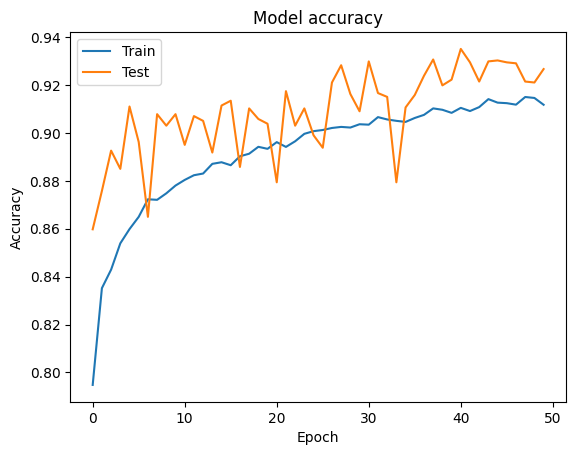

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



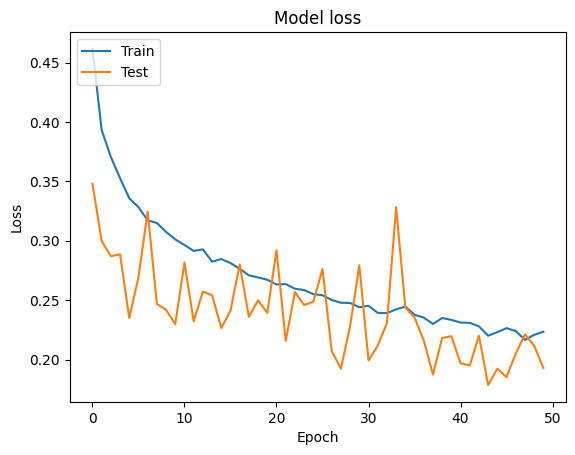

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#for two classes
# Displaying the Classification Report & Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib
from keras.models import load_model

class_labels = {0:'O', 1:'R'}

Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1) # put classifier not model
y_pred = np.argmax(Y_pred, axis=1)

#Classification Report
print('\n Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

#Confution Matrix
print('\n Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))





 Classification Report
              precision    recall  f1-score   support

           O       0.93      0.94      0.93      1401
           R       0.92      0.91      0.92      1112

    accuracy                           0.93      2513
   macro avg       0.93      0.92      0.93      2513
weighted avg       0.93      0.93      0.93      2513


 Confusion Matrix
[[1319   82]
 [ 102 1010]]


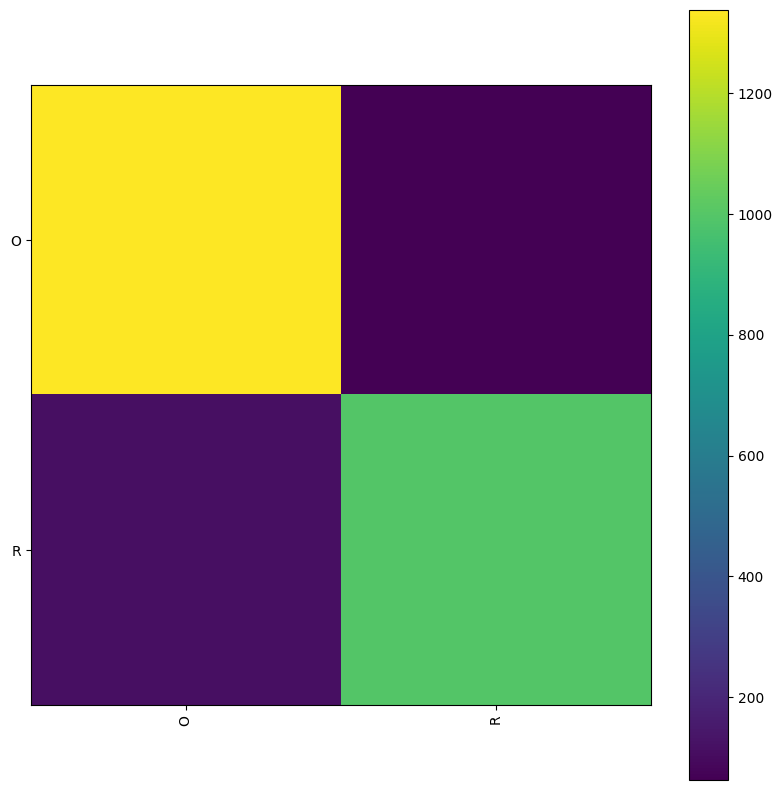

In [ ]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 224,224,3
model = load_model('/content/drive/MyDrive/Colab/Waste_Data/waste.h5')

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 22538
nb_validation_samples = 2499

#Confution Matrix 
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(10,10))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [ ]:
#Testing
model.load_weights('/content/drive/MyDrive/Colab/Waste_Data/waste.h5')
model.evaluate(validation_generator);

79/79 [==============================] - 9s 114ms/step - loss: 0.1789 - accuracy: 0.9300


1/1 [==============================] - 8s 8s/step
[[0. 1.]]
this is Non-Organic


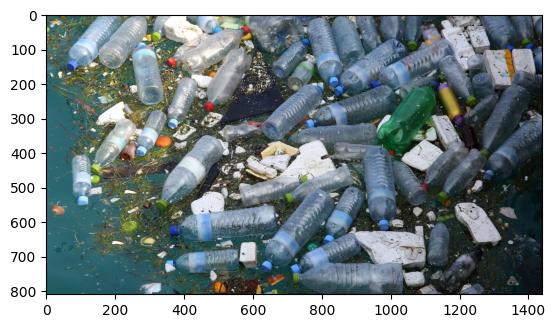

In [3]:
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

#image_path = '/content/drive/MyDrive/ColabNotebooks/waste/DATASET/TEST/R/R_10002.jpg'
#image_path = '/content/drive/MyDrive/ColabNotebooks/waste/DATASET/TEST/O/O_12569.jpg'

#Testing out Images

image_path = '/content/drive/MyDrive/Colab/Waste_Data/bottle.jpg'

model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Colab/Waste_Data/waste.h5')
test_image = load_img(image_path,target_size = (224,224,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)
print(result)
if result[0][0] == 1:
  print("This is Organic")
else:
  print("this is Non-Organic")
  # reading the image
testImage = img.imread(image_path)
 
# displaying the modified image
plt.imshow(testImage)

# Transfer Learning